# Tagged cross-section ratio of $(e,e'\pi^+)/(e,e'\pi^+)$ 

$$\left(\frac{\sigma(e,e'\pi^+)}{\sigma(e,e'\pi^+)}\right)_{p_n>275 GeV/c}$$

last edit July-12 2022

## Imports and definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
sys.path.insert(0, '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/'); 
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## (1) Load data

In [2]:
load_SIDIS_data( Nruns = 101,  do_e_e_pi=False, fdebug=1)

Done loading files.

Total statistics:
4722  (e,e'π+n) events
1339  (e,e'π-n) events


## (2) Apply selection cuts not previously imposed

In [42]:
_,e_e_pi_n_pass_cuts,_ = apply_further_selection_cuts_to_data(fdebug=2);

Applying selection cuts not previously imposed
(e,e'πn)
Apply a cut on the minimal neutron momentum p > 0.275 GeV/c
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 3360 events
Subdividing into 1 subsets up to 500000 events
subset 0 of index 0-3359
Applying p-theta on cut for piminus on 906 events
Subdividing into 1 subsets up to 500000 events
subset 0 of index 0-905
(e,e π+ )
4722 events before cut
3360 events after min p(n) cut (71.2 %)
3353 events after p-theta cut (71.0 %)
(e,e π- )
1339 events before cut
906 events after min p(n) cut (67.7 %)
905 events after p-theta cut (67.6 %)
 
Done applying selection cuts not previously imposed


## (3) Extract cross-section ratio as a function of Bjorken $x$
For a moving proton $x'$, defined as
$ x' = Q^2/((W')^2 - m_N^2 + Q^2)$

In [10]:
z_bins   = [0.4,0.5,0.75]
z_widths = [0.1,0.1,0.15]
x_bins   = np.linspace(0.2,0.6,5)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
x_bins

array([0.2, 0.3, 0.4, 0.5, 0.6])

In [11]:
var_label = "standing proton x"
# var_label = "moving proton x"

if   var_label == "standing proton x":
    var    = 'xB'
    xlabel = "Bjorken $x$"
    
elif var_label == "moving proton x":
    var    = 'xPrime2'
    xlabel = "$x' = Q^2/(W'^2 - m_N^2 + Q^2)$"    

In [12]:

Rpips2pims_n, Rpips2pims_n_errup, Rpips2pims_n_errdw = dict(), dict(), dict()
Y, dY = dict(),dict()
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width,z_bin+z_width
    (Rpips2pims_n[z_bin],
     Rpips2pims_n_errup[z_bin], 
     Rpips2pims_n_errdw[z_bin],_,_) = compute_ratio_pips_to_pims(df_dict=e_e_pi_n  , 
                                                             var=var, 
                                                             bins=x_bins, 
                                                             z_min=z_min,z_max=z_max)

    # fit to a constant 
    y    = Rpips2pims_n[z_bin]
    y_err= (Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
    p,cov = np.polyfit(x,y,deg=0,cov=True)
    Y[z_bin],dY[z_bin] = p[0],cov[0,0]

    # print(z_bin,Rpips2pims_n[z_bin],Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
print('done') 

done


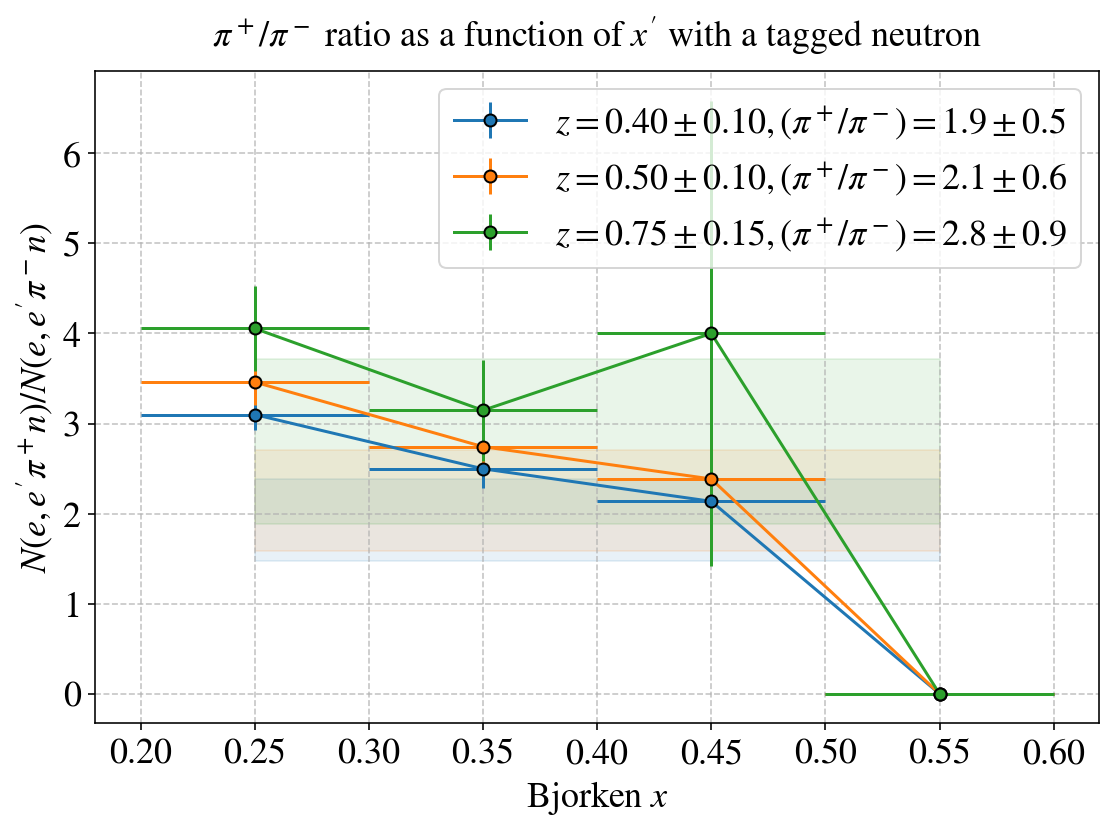

In [13]:
fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(1,1,1)
for z_bin,z_width in zip(z_bins,z_widths):
    y    = Rpips2pims_n[z_bin]
    y_err= (Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
    x_fit = np.linspace(np.min(x),np.max(x),100)
    y_dw = (Y[z_bin]-dY[z_bin])*np.ones(len(x_fit))
    y_up = (Y[z_bin]+dY[z_bin])*np.ones(len(x_fit))

    # plot
    l=ax.errorbar(x=x, xerr=x_err,  y=y, yerr=y_err,
                marker='o',markeredgecolor='k',
                label='$z=%.2f\pm%.2f, (\pi^+/\pi^-)=%.1f\pm%.1f$'%(z_bin,z_width,Y[z_bin],dY[z_bin]))
    
    ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
set_axes(ax,xlabel,"$N(e,e'\pi^+n)/N(e,e'\pi^-n)$",
         title="$\pi^+/\pi^-$ ratio as a function of $x'$ with a tagged neutron",
         do_add_grid=True, do_add_legend=True, fontsize=18,
        );

# (4) Save results to file

In [17]:
save_SIDIS_ratio_DataFrame(df_dict  = e_e_pi_n_pass_cuts,                                
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           prefix   = 'Tagged_SIDIS_ratio_',                           
                           suffix   = '')

saved /Users/erezcohen/Desktop/data/BAND/Results/Tagged_SIDIS_ratio_z_0.30-0.50.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Tagged_SIDIS_ratio_z_0.40-0.60.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Tagged_SIDIS_ratio_z_0.60-0.90.csv


## load results and plot them

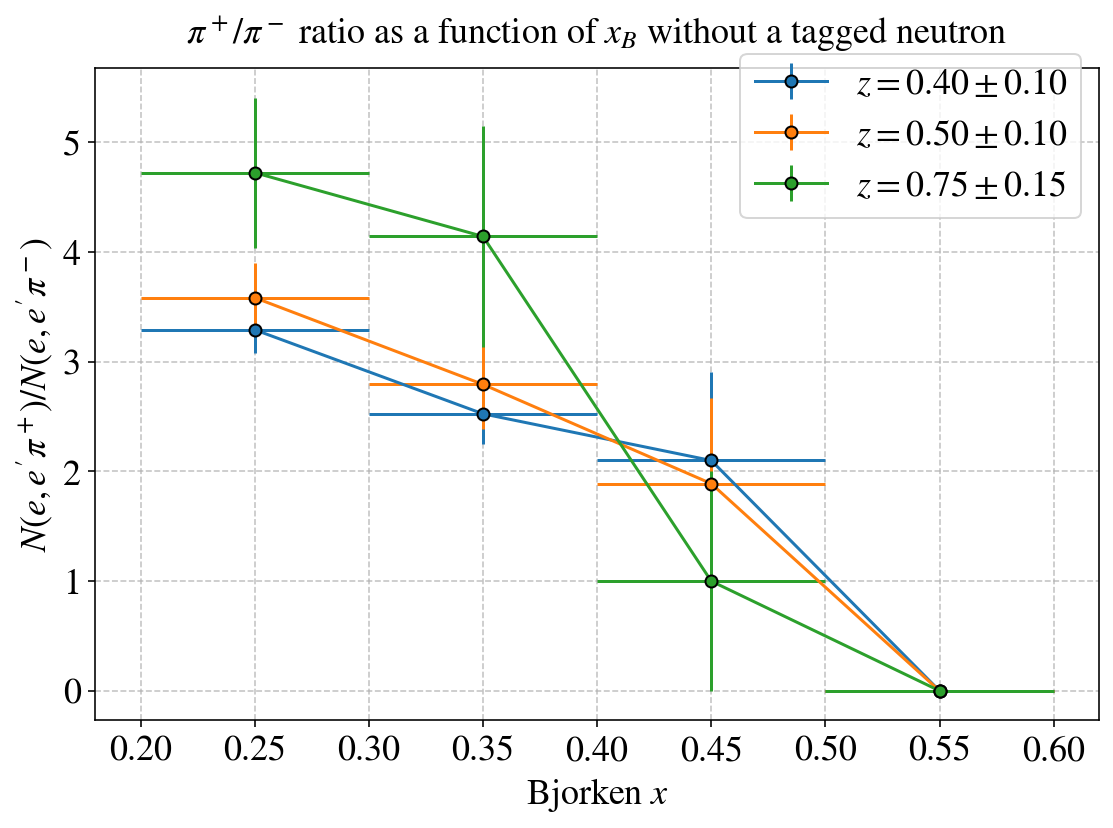

In [21]:
prefix = 'Tagged_SIDIS_ratio_'
suffix = ''
SIDIS_results = load_SIDIS_ratio_DataFrame(z_bins=z_bins,z_widths=z_widths,
                                           prefix = prefix, suffix = suffix, doPlotResults=True)

# (5) Extract modified results
With no acceptance matching cut in $p-\theta$ plane

In [39]:
_,e_e_pi_n_pass_cuts_no_p_theta_cut,_ = apply_further_selection_cuts_to_data(fdebug=2,
                                                                           NeventsMax=-1, 
                                                                           doAcceptanceMatchingCut=False);

Applying selection cuts not previously imposed
(e,e'πn)
Apply a cut on the minimal neutron momentum p > 0.275 GeV/c
(e,e π+ )
4722 events before cut
3360 events after min p(n) cut (71.2 %)
3360 events after p-theta cut (71.2 %)
(e,e π- )
1339 events before cut
906 events after min p(n) cut (67.7 %)
906 events after p-theta cut (67.7 %)
 
Done applying selection cuts not previously imposed


In [40]:
save_SIDIS_ratio_DataFrame(df_dict  = e_e_pi_n_pass_cuts_no_p_theta_cut,                                
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           prefix   = 'Tagged_SIDIS_ratio_',                           
                           suffix   = '_No_AcceptanceMatchingCut')

saved /Users/erezcohen/Desktop/data/BAND/Results/Tagged_SIDIS_ratio_z_0.30-0.50_No_AcceptanceMatchingCut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Tagged_SIDIS_ratio_z_0.40-0.60_No_AcceptanceMatchingCut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Tagged_SIDIS_ratio_z_0.60-0.90_No_AcceptanceMatchingCut.csv


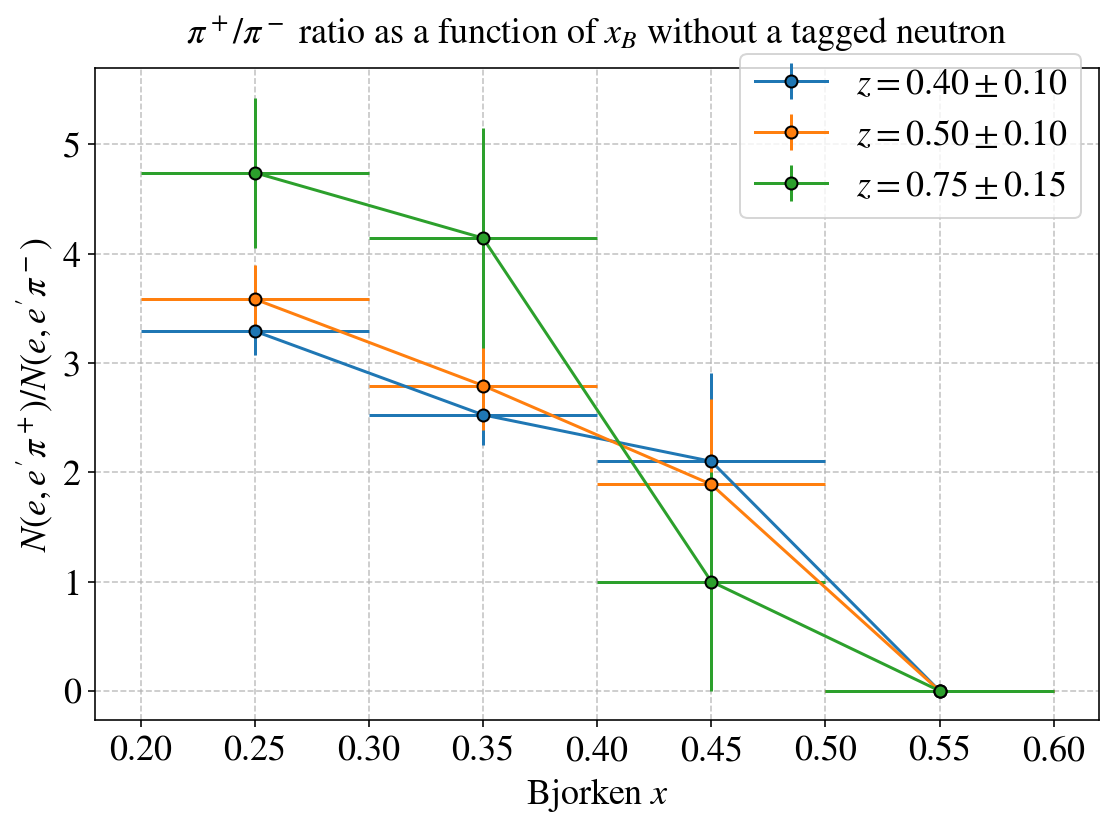

In [41]:
prefix = 'Tagged_SIDIS_ratio_'
suffix = '_No_AcceptanceMatchingCut'
Tagged_SIDIS_results = load_SIDIS_ratio_DataFrame(z_bins=z_bins,z_widths=z_widths,
                                                  prefix = prefix, suffix = suffix, doPlotResults=True)